### Importing libraries and data

NEW LINE

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
final_test_data = pd.read_csv("/content/drive/MyDrive/Data/test.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Data/train.csv")

### Visualizing data and basic statics

In [40]:
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [41]:
train_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Maybe use this **Product ID** to check if the number of a specific Product influence the **failure rate**.

In [42]:
train_data['Product ID'].value_counts()

L53257    139
L49056    131
L53271    131
L54275    120
L48892    120
         ... 
M24614      1
H39399      1
M15853      1
H32637      1
L48036      1
Name: Product ID, Length: 9976, dtype: int64

Text(0.5, 0, 'Type')

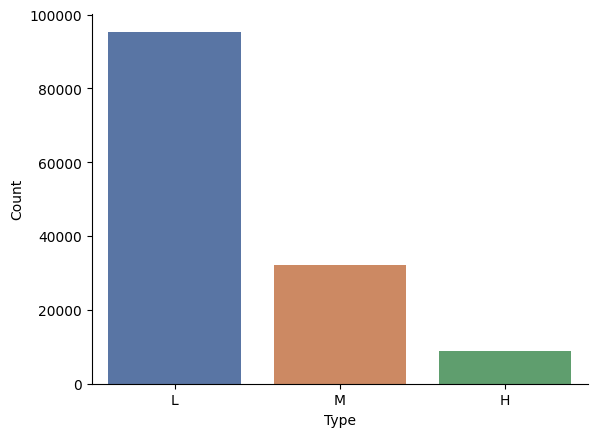

In [43]:
class_counts = train_data['Type'].value_counts()
sns.barplot(x= class_counts.index, y= class_counts.values, hue= class_counts.index, palette='deep')
sns.despine()
plt.ylabel('Count')
plt.xlabel('Type')

Text(0.5, 0, 'Failure')

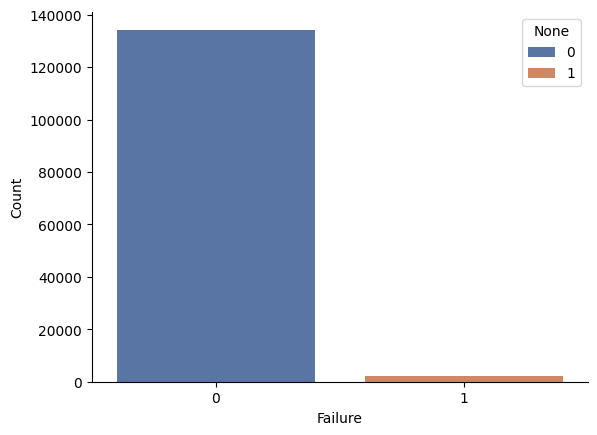

In [44]:
class_counts = train_data['Machine failure'].value_counts()
sns.barplot(x= class_counts.index, y= class_counts.values, hue= class_counts.index, palette='deep')
sns.despine()
plt.ylabel('Count')
plt.xlabel('Failure')

Very imbalanced data!!

In [45]:
train_data.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

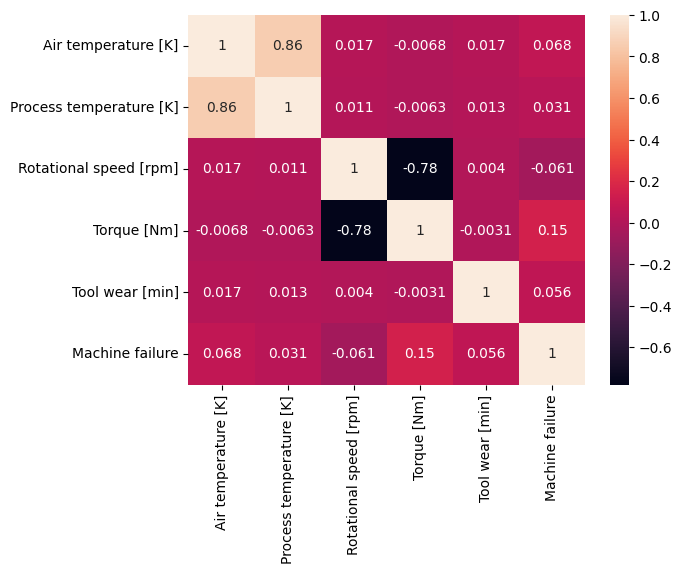

In [46]:
sns.heatmap(train_data[['Air temperature [K]','Process temperature [K]',
                        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']].corr(),
            annot=True)

Apparently none of the other features interferes (alone) that much to Machine Failure.

### Cleaning data function

In [169]:
def count_products(dataframe):
  products = pd.DataFrame(dataframe['Product ID'].value_counts().reset_index())
  products.rename(columns= {'Product ID': 'Product ID Count',
                            'index': 'Product ID'}, inplace=True)
  dataframe = dataframe.merge(right= products, how= 'inner', on= 'Product ID')

  dataframe.drop(columns=['id', 'Product ID'], axis=1, inplace=True)

  return dataframe

In [193]:
train_data = count_products(train_data)

In [174]:
train_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product ID Count
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,25
1,L,300.6,309.5,1411,41.6,140,0,0,0,0,0,0,25
2,L,300.6,309.6,1528,41.6,221,0,0,0,0,0,0,25
3,L,300.6,309.5,1411,41.6,140,0,0,0,0,0,0,25
4,L,300.5,309.2,1771,28.1,125,0,0,0,0,0,0,25


In [195]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train_data.drop('Machine failure', axis=1)
y = train_data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [196]:
y.value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [201]:
one= ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Type'])],
                       remainder= 'passthrough', verbose_feature_names_out = False)
X_trans = one.fit_transform(X_train)

In [202]:
X_trans

array([[ 0.,  1.,  0., ...,  0.,  0., 10.],
       [ 0.,  1.,  0., ...,  0.,  0., 11.],
       [ 0.,  1.,  0., ...,  0.,  0., 15.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0., 28.],
       [ 0.,  1.,  0., ...,  0.,  0.,  5.],
       [ 0.,  1.,  0., ...,  0.,  0., 12.]])

In [204]:
X_res, y_res = SMOTE(random_state=42).fit_resample(X_trans,y_train)

In [205]:
y_res.value_counts()

0    89968
1    89968
Name: Machine failure, dtype: int64

In [206]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB

cf = ComplementNB()

cf.fit(X_res, y_res)

ComplementNB()

In [208]:
X_test_trans = one.fit_transform(X_test)

In [210]:
y_pred = cf.predict_proba(X_test_trans)

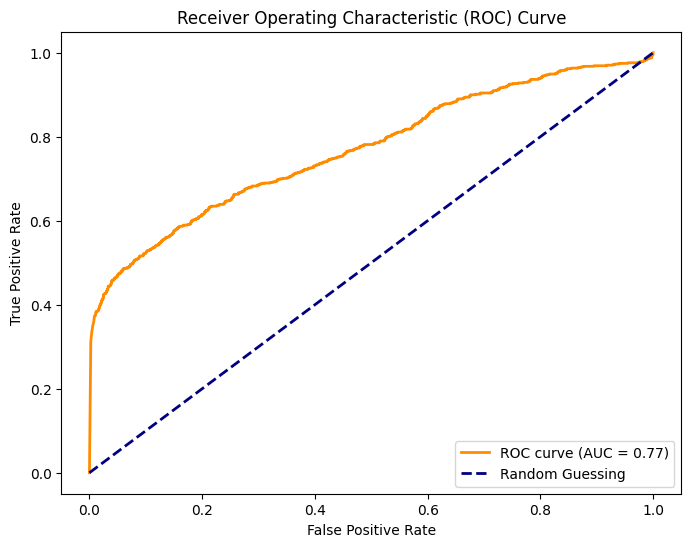

In [211]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Setting up the pipeline to use Naive Bayes

In [190]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



pipeline = make_pipeline(
    FunctionTransformer(count_products),
    ColumnTransformer(
        transformers=[('onehot', OneHotEncoder(), ['Type'])],
        remainder= 'passthrough', verbose_feature_names_out = False),
    SMOTE(random_state=42),
    ComplementNB()
)


X = train_data.drop('Machine failure', axis=1)
y = train_data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_test,)

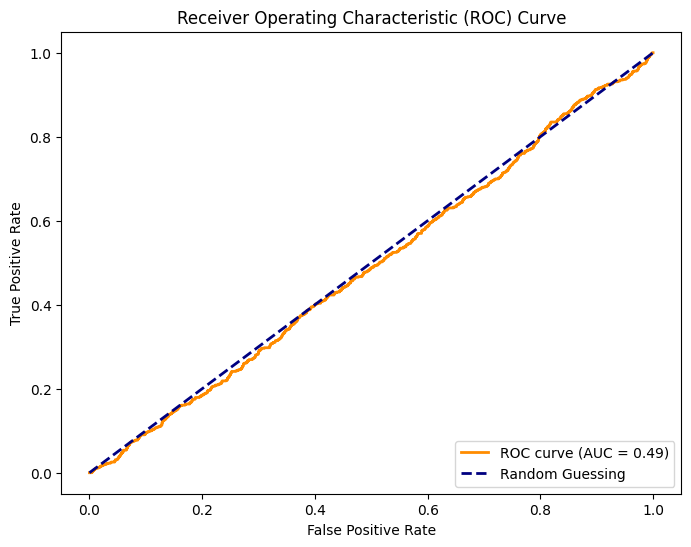

In [191]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_pred=y_pred[:,1], y_true=y_test), annot=True, fmt='.10g')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
print(classification_report(y_pred=y_pred, y_true=y_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [56]:
y_test.value_counts()

0    44313
1      709
Name: Machine failure, dtype: int64